In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hello folks! this is car evaluation database 1997. 

In [5]:
df = pd.read_csv('CArdata.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,5more,more,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
vhigh      1727 non-null object
vhigh.1    1727 non-null object
2          1727 non-null object
2.1        1727 non-null object
small      1727 non-null object
low        1727 non-null object
unacc      1727 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


lets change the column name so that we can understand the data easily.

In [8]:
df.columns = ['price','maintenance_cost','no of doors','capacity','LuggageBoot','safety','Decision']

In [9]:
df

,price,maintenance_cost,no of doors,capacity,LuggageBoot,safety,Decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


lets see if there is any null values in the data set

In [10]:
df.isnull().any()

price               False
maintenance_cost    False
no of doors         False
capacity            False
LuggageBoot         False
safety              False
Decision            False
dtype: bool

In [11]:
a=df['Decision'].value_counts()
a

unacc    1209
acc       384
good       69
vgood      65
Name: Decision, dtype: int64

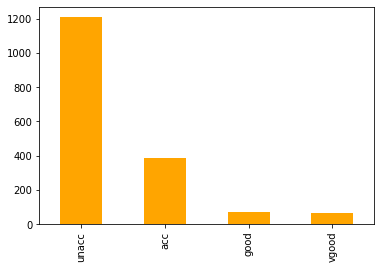

In [27]:
a.plot(kind = 'bar',color = 'orange')

In [12]:
b = df['price'].value_counts()
b

med      432
high     432
low      432
vhigh    431
Name: price, dtype: int64

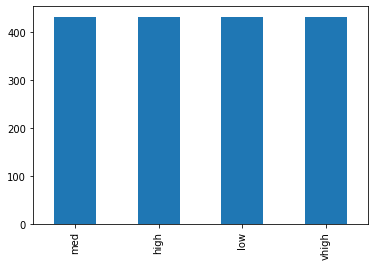

In [22]:
b.plot(kind = 'bar')

In [33]:
m=df['maintenance_cost'].value_counts()

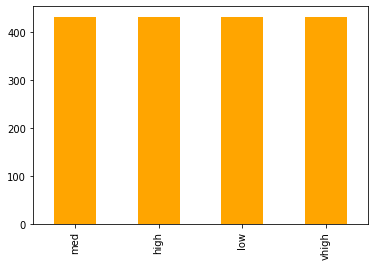

In [34]:
m.plot(kind='bar',color='orange')

In [30]:
d=df['no of doors'].value_counts()

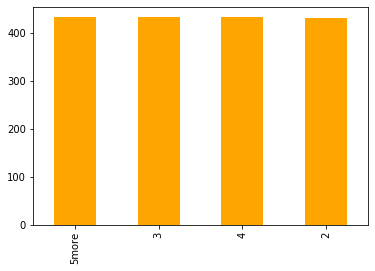

In [32]:
d.plot(kind='bar', color = 'orange')

In [38]:
c=df['capacity'].value_counts()

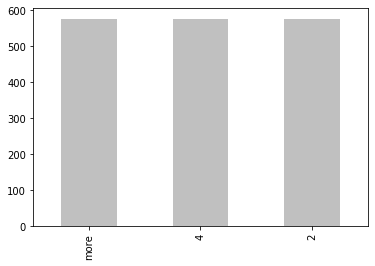

In [39]:
c.plot(kind='bar',color='silver')

In [35]:
l=df['LuggageBoot'].value_counts()

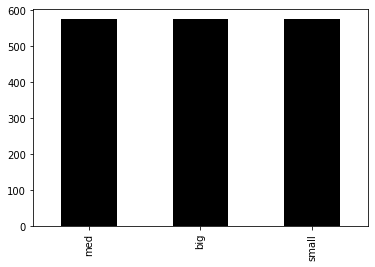

In [37]:
l.plot(kind='bar',color='black')

In [40]:
s=df['safety'].value_counts()

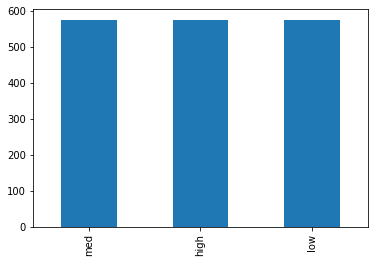

In [41]:
s.plot(kind='bar')

In [42]:

import seaborn as sns

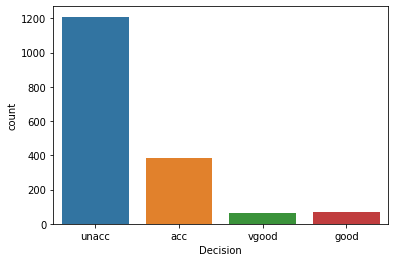

In [44]:

sns.countplot(x='Decision',data=df)

In [50]:
df.isnull().sum()

price               0
maintenance_cost    0
no of doors         0
capacity            0
LuggageBoot         0
safety              0
Decision            0
dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()

In [56]:
list1=['price','maintenance_cost','no of doors','capacity','LuggageBoot','safety','Decision']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [57]:
df

,price,maintenance_cost,no of doors,capacity,LuggageBoot,safety,Decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [53]:
df.dtypes

price               object
maintenance_cost    object
no of doors         object
capacity            object
LuggageBoot         object
safety              object
Decision            object
dtype: object

In [59]:
df['Decision'].value_counts()

2    1209
0     384
1      69
3      65
Name: Decision, dtype: int64

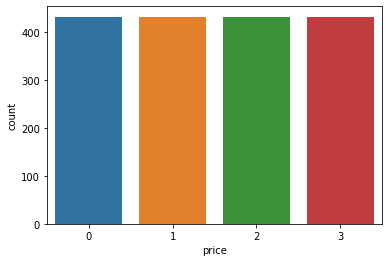

In [62]:
sns.countplot(x='price',data = df)

In [65]:
df['price'][:-1]

0       3
1       3
2       3
3       3
4       3
       ..
1721    1
1722    1
1723    1
1724    1
1725    1
Name: price, Length: 1726, dtype: int64

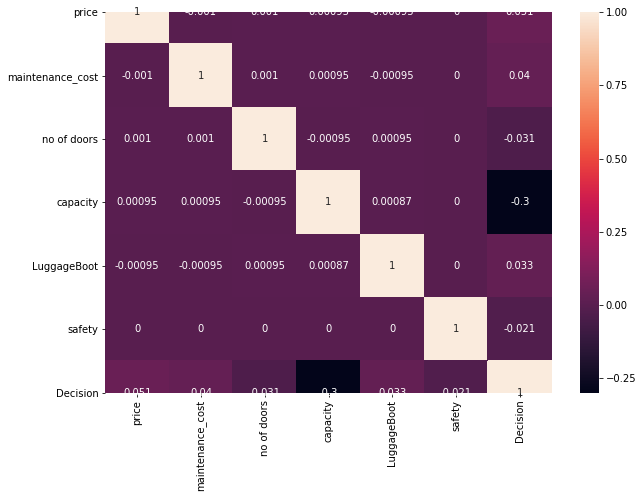

In [69]:
corr_hmap=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()


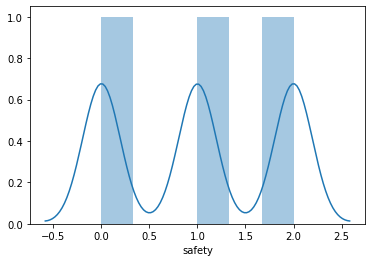

In [70]:
sns.distplot(df['safety'])

In [72]:
X=df[df.columns[:-1]]
y=df['Decision']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [104]:
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
pred=logreg.predict(X_test)

In [106]:
logreg.score(X_test,y_test)

0.697495183044316

In [113]:
from sklearn.model_selection import learning_curve

So, basic logistic regression model is giving very less accuracy. Let's check the learning curves

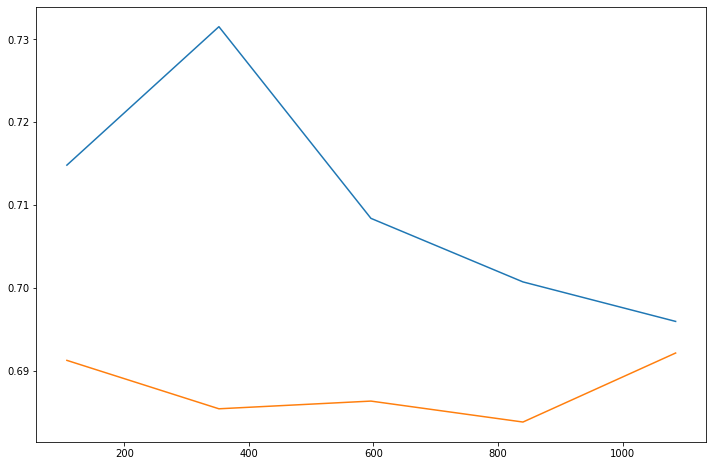

In [114]:
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [115]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

In [116]:
curve

(array([[0.7033195 , 0.70259067, 0.70113754, 0.70144628, 0.70144628],
        [0.7033195 , 0.70259067, 0.70113754, 0.70144628, 0.70144628],
        [0.70124481, 0.70569948, 0.70010341, 0.69938017, 0.69731405],
        [0.69605809, 0.69740933, 0.69286453, 0.6911157 , 0.69318182]]),
 array([[0.69672131, 0.69958848, 0.70539419, 0.70416667, 0.70416667],
        [0.69672131, 0.69958848, 0.70539419, 0.70416667, 0.70416667],
        [0.70901639, 0.67078189, 0.71369295, 0.70833333, 0.70416667],
        [0.67213115, 0.66666667, 0.70954357, 0.7125    , 0.67083333]]))

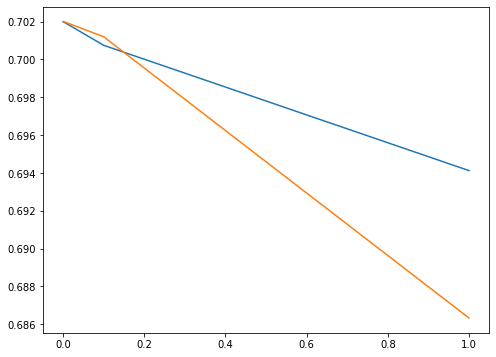

In [117]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [120]:
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [121]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7061258278145696


So, with the above parameters, we can get at accuary of 71%.

As it is an unbalanced classification problem, accuracy can't be a good criterion for evaluation. But accuary itself is very low, so, I didn't check for other criteria.

KNN Classifier


As logistic regression didn't give accuracy, I tried KNN classification

In [123]:
knn=KNeighborsClassifier(n_jobs=-1)

In [124]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.9036608863198459

So, the default KNN classificaton model is giving an accuracy of 90%

In [125]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       118
           1       0.80      0.24      0.36        17
           2       0.92      1.00      0.96       361
           3       1.00      0.70      0.82        23

    accuracy                           0.90       519
   macro avg       0.89      0.67      0.73       519
weighted avg       0.90      0.90      0.89       519



f1 score is .89, which is better than previous model

In [127]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())


Text(0, 0.5, 'accuracy')

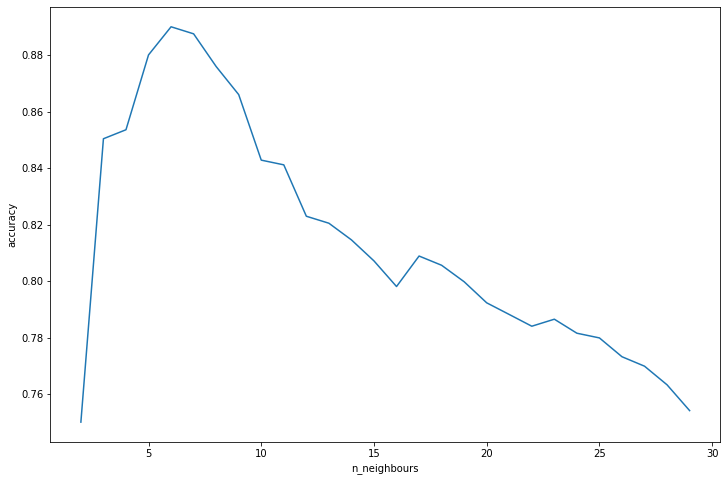

In [129]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

So, n_neighbours=6 is giving better accuracy as well as f1-score for our data.

So, with KNN Classification algorithm, we are able to achieve accuracy around 90%

Random Forests Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [133]:
 from sklearn.metrics import f1_score

In [134]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='macro'))

0.9614643545279383
0.8836964015051763


So, the basic model of RFC is giving 96% accuracy.

Now, check the effect of n_estimators on the model

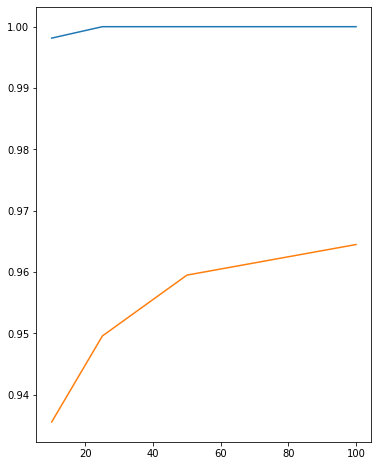

In [135]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range


So, with the increasing n_estimators, test accuracy is increasing. Model is evaluating best at n_estimators=100. After n_estimators=50,model starts overfitting. Now, we've reached approx. 96.3% accuracy.

Now, check how the model fits for various values of 'max_features'

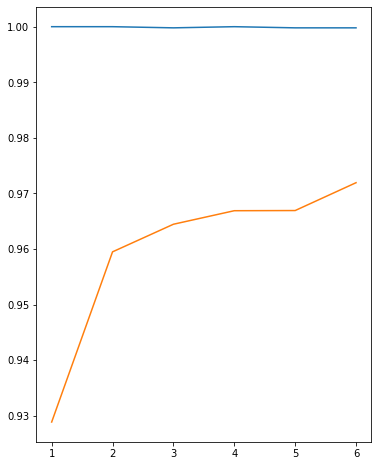

In [136]:
param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),X_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

From above graph, it is clear that model is giving best resut for max_features=6. Still the model is overfitting.

Now we've reached 97.7% accuracy approx.

We can also check of other parameters like 'max_depth','criterion',etc using above code.

Another simple way is to use GridSearch to get combination of best parameters. As this dataset is small, GridSearch will take less time to complete.



In [138]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [139]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [140]:
grid.fit(X_train,y_train)

/home/himanshu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criteri

In [141]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': None}
0.9801324503311258


So, with above parameters for RFC, we've reached 98.42% accuracy.

LEARNING CURVE

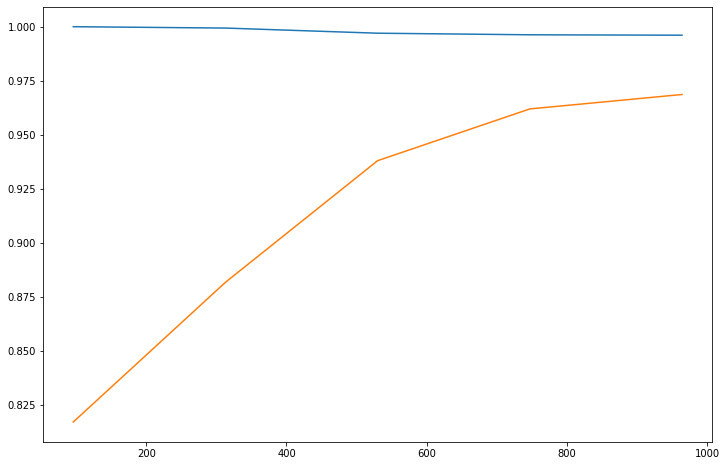

In [142]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)


Conclusion
Random Forest Classifier is the best suitable model for this data with following parameters: n_estimators: 50 criterion: entropy max_depth: 10 max_features: 6 max_leaf_nodes: None

We are able to achieve 98.43% accuracy with this model